In [1]:
import numpy as np
import pandas as pd
#from pandas_datareader import DataReader
import pandas_datareader
from datetime import datetime
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm

import ipywidgets as widgets

%matplotlib inline

In [2]:
LIST = ['JILL','ELTK','ONVO','UAVS','AEY','OBLN','XRF','MLSS','MICT','SOLY','NMRD','ZFGN','INUV','VTGN','RBZ','BURG','MTSL','DXR','QADA','MYOV','BOSC','APTO','PESI','TITN','EYEG','CAPR','UROV','APDN','TTPH','ECOR','WYND','ZN','OSN','HDSN','BDR','TBLT','PLM','DMRC','MOV','PVH','TLYS','CPAH','VLRX','SDRL','RWLK','VEEV','OPRX','RAVE','PFSW','SPWH','TMDX','DOOO','TC','NBY','WSTL','KEYS','DBI','INAP','RVLT','JASN','CNET','RVLV','REKR','SUMR','MBOT','BDGE','FOLD','SRRA','IDN','PIXY','AAC','LYL','MHLD','NIO','SLS','NNVC','MYT','BYND','CREG','ATIS','TCCO','AAMC','OXBR','ANCN','BCRX','ALRN','RTW','LTBR','WWR','CTRC','VTVT','MACK','NDRA','OTLK','MYT','BYND','CREG','ATIS','TCCO','AAMC','OXBR','ANCN','BCRX','ALRN','RTW','LTBR','WWR','HTHT','CTRC','MACK']
List = sorted(list(set(LIST)))
print(List)

returns_port = pd.DataFrame()
for i in List:
    one_stock = pandas_datareader.DataReader(i,'yahoo',datetime(2019,6,28),datetime(2019,8,31))
    returns_one_stock = pd.DataFrame(np.diff(np.log(one_stock['Adj Close'].values)))
    #dat1 = pd.concat([dat1, dat2], axis=1)
    returns_port = pd.concat([returns_port, returns_one_stock], axis=1)
returns_port.columns = List
returns_port.head()

['AAC', 'AAMC', 'AEY', 'ALRN', 'ANCN', 'APDN', 'APTO', 'ATIS', 'BCRX', 'BDGE', 'BDR', 'BOSC', 'BURG', 'BYND', 'CAPR', 'CNET', 'CPAH', 'CREG', 'CTRC', 'DBI', 'DMRC', 'DOOO', 'DXR', 'ECOR', 'ELTK', 'EYEG', 'FOLD', 'HDSN', 'HTHT', 'IDN', 'INAP', 'INUV', 'JASN', 'JILL', 'KEYS', 'LTBR', 'LYL', 'MACK', 'MBOT', 'MHLD', 'MICT', 'MLSS', 'MOV', 'MTSL', 'MYOV', 'MYT', 'NBY', 'NDRA', 'NIO', 'NMRD', 'NNVC', 'OBLN', 'ONVO', 'OPRX', 'OSN', 'OTLK', 'OXBR', 'PESI', 'PFSW', 'PIXY', 'PLM', 'PVH', 'QADA', 'RAVE', 'RBZ', 'REKR', 'RTW', 'RVLT', 'RVLV', 'RWLK', 'SDRL', 'SLS', 'SOLY', 'SPWH', 'SRRA', 'SUMR', 'TBLT', 'TC', 'TCCO', 'TITN', 'TLYS', 'TMDX', 'TTPH', 'UAVS', 'UROV', 'VEEV', 'VLRX', 'VTGN', 'VTVT', 'WSTL', 'WWR', 'WYND', 'XRF', 'ZFGN', 'ZN']


,AAC,AAMC,AEY,ALRN,ANCN,APDN,APTO,ATIS,BCRX,BDGE,...,VEEV,VLRX,VTGN,VTVT,WSTL,WWR,WYND,XRF,ZFGN,ZN
0,0.045462,0.043393,0.049393,-0.049832,0.000000,0.019803,0.011429,0.036149,-0.021334,0.000679,...,0.008354,-0.007663,-0.013793,-0.007018,-0.071656,-0.041891,0.028519,-0.091350,-0.016950,0.087011
1,0.134919,0.055862,-0.018238,0.010167,-0.050354,0.038466,-0.015268,0.000000,-0.032880,-0.021949,...,0.018966,0.041437,0.000000,0.020907,0.011364,0.029853,-0.006887,0.000000,0.025318,-0.087011
2,0.056619,0.000000,-0.012346,-0.002894,0.049461,-0.019048,0.077673,0.034887,0.027474,-0.001388,...,0.012408,0.050370,-0.028171,-0.020907,-0.017094,-0.031637,0.016361,-0.058182,0.000000,0.029853
3,-0.009217,-0.007905,0.048494,0.014389,-0.005376,0.000000,0.068756,-0.046792,0.010782,0.020279,...,0.008089,-0.028472,0.000000,0.007018,0.033902,0.052186,-0.000219,-0.069157,0.032790,-0.029853
4,0.096992,0.090972,0.000000,0.000000,0.000000,-0.019418,-0.016751,-0.006006,-0.021681,-0.007514,...,-0.012903,0.017890,-0.028988,0.000000,-0.022473,-0.034486,-0.009920,-0.061088,-0.008097,0.114410


In [3]:
portfolios = np.mat(returns_port)

FAMA_FRENCH = pd.read_csv('C:/Users/mohdn/Downloads/F-F_Research_Data_5_Factors_2x3_daily.csv')

symd = 20190628
eymd = 20190830

#FAMA = FAMA_FRENCH[(FAMA_FRENCH['Date']>symd) & (FAMA_FRENCH['Date']<=eymd)]
#print(FAMA)
#FAMA = FAMA_FRENCH.iloc[24514:24558,1:5].copy()
FAMA = FAMA_FRENCH.iloc[14095:14139,].copy()
print(FAMA)

MKT = pd.DataFrame(FAMA['Mkt-RF'] -  FAMA['RF'])
SMB = pd.DataFrame(FAMA['SMB'])
HML = pd.DataFrame(FAMA['HML'])
RMW = pd.DataFrame(FAMA['RMW'])
CMA = pd.DataFrame(FAMA['CMA'])

MKT.reset_index(drop=True,inplace=True)
SMB.reset_index(drop=True,inplace=True)
HML.reset_index(drop=True,inplace=True)
RMW.reset_index(drop=True,inplace=True)
CMA.reset_index(drop=True,inplace=True)

[T,N] = portfolios.shape

m=np.ones((T,1))

F = np.concatenate((m,MKT,SMB,HML,RMW,CMA),axis=1)

factors = np.mat(F)

K = F.shape[1]

beta = np.mat(np.zeros((K,N)))
#eta = np.mat(np.zeros((K,N)))

# Step 1 Running Times Series Regression

for j in range(portfolios.shape[1]):
    x = factors
    y = portfolios[:,[j]]
    beta[:,[j]] = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T,x)),x.T),y) 

       Unnamed: 0  Mkt-RF   SMB   HML   RMW   CMA     RF
14095    20190701    0.75 -0.59 -0.18 -0.13  0.03  0.009
14096    20190702    0.14 -0.97 -0.79 -0.02  0.04  0.009
14097    20190703    0.78 -0.15 -0.31 -0.33 -0.05  0.009
14098    20190705   -0.10  0.33  0.89  0.10 -0.06  0.009
14099    20190708   -0.58 -0.43  0.03  0.03 -0.25  0.009
14100    20190709    0.18 -0.24 -0.53 -0.63 -0.26  0.009
14101    20190710    0.40 -0.27 -0.39  0.11 -0.03  0.009
14102    20190711    0.19 -0.78  0.03 -0.23 -0.54  0.009
14103    20190712    0.53  0.33  0.44  0.57 -0.07  0.009
14104    20190715   -0.04 -0.51 -0.99  0.14  0.25  0.009
14105    20190716   -0.32  0.39  0.15  0.48 -0.04  0.009
14106    20190717   -0.64 -0.27 -0.68 -0.50 -0.23  0.009
14107    20190718    0.35 -0.29 -0.03 -0.31  0.39  0.009
14108    20190719   -0.56  0.29  0.89  0.36  0.16  0.009
14109    20190722    0.25 -0.54 -0.50 -0.19  0.01  0.009
14110    20190723    0.65 -0.04  0.82  0.66  0.35  0.009
14111    20190724    0.66  0.92

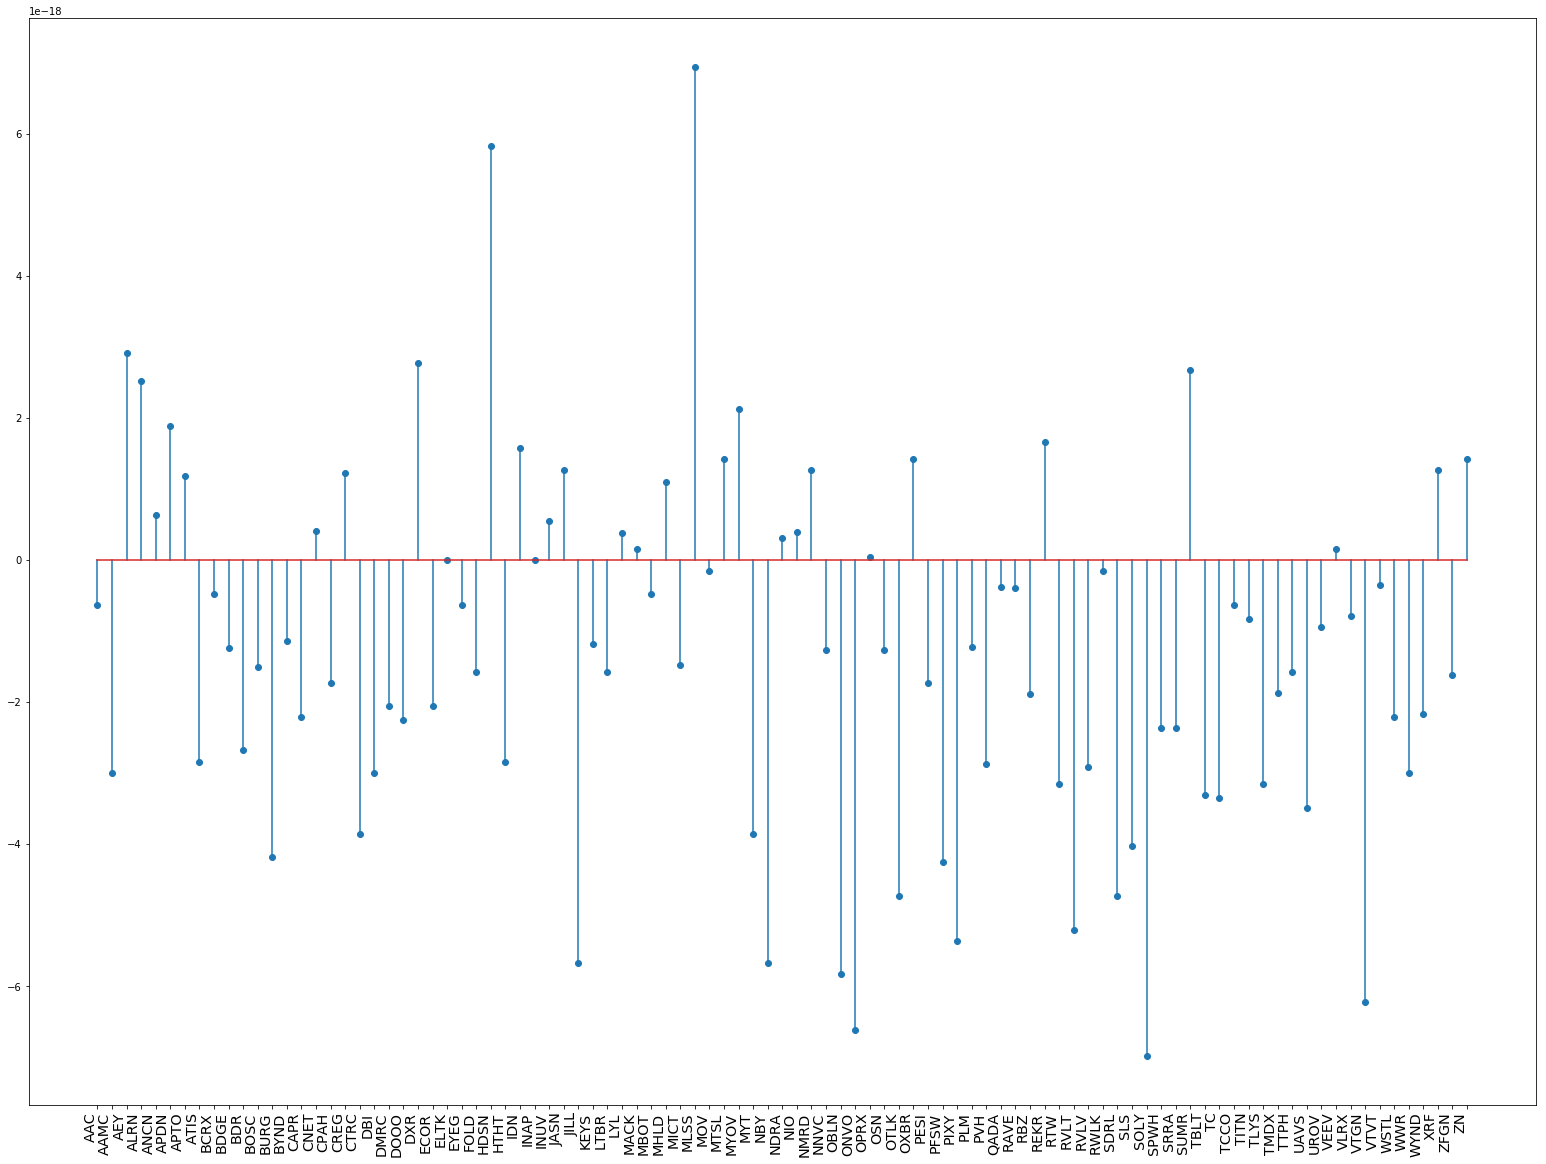

In [5]:
#Step 2. RUN CROSS-SECTIONAL REGRESSION
# ACTIVE RETURNS
lamb = np.zeros((K,T))
alpha = np.zeros((N,T))
sigma = np.zeros((T,N,N))

for i in range(portfolios.shape[0]):
    x = beta.T
    y = portfolios[[i],:].T
    lambdafun = np.matmul(np.matmul(np.linalg.inv(np.matmul(x.T,x)),x.T),y)
    lamb[:,[i]] = lambdafun
    alpha[:,[i]] = np.subtract(y,np.matmul(x,lambdafun))
    sigma[[i],:,:] = np.matmul(alpha[:,[i]],alpha[:,[i]].T)

ALPHA = alpha.mean(axis =1)
SIGMA = sigma.mean(axis =0)

#Visualizing the active returns 

x = pd.DataFrame(ALPHA,columns=['Values'])
x['Stock'] = List
plt.rcParams["figure.figsize"] = (27,20)
plt.stem(x['Stock'] , x['Values'])
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'
)
plt.savefig('Fama_5_active_return.png')
plt.show()


In [6]:
#calculating wieghts using MVP :

R = ALPHA
R = np.reshape(R,(95,1))
I = np.ones((N,1))
V = SIGMA
V_inv = np.linalg.inv(V)

a = float(np.matmul(np.matmul(R.T,V_inv),R))
b = float(np.matmul(np.matmul(R.T,V_inv),I))
c = float(np.matmul(np.matmul(I.T,V_inv),I))

A = np.matrix([[a,b],[b,c]],dtype = 'float')
A_inv = np.linalg.inv(A)

r_star = (b/c)

lamda_halfs = np.matmul(A_inv,([[r_star],[1]]))

#R.shape
x = float(lamda_halfs[0])*np.matmul(V_inv,R) + float(lamda_halfs[1])*np.matmul(V_inv,I)
print(sum(x))
#print(x)

[1.]


In [7]:
variance_of_portfolio = np.matmul(np.matmul(x.T,V),x)

variance_check = 8.67361738e-19*r_star + 3.43072332e-20
print(variance_check)
print(variance_of_portfolio)

3.4307233199999996e-20
[[4.14805653e-19]]


     Weights Stocks      Risk
61  0.984936    PVH  0.015214
15  0.848464   CNET  0.030458
28  0.781988   HTHT  0.025157
62  0.768743   QADA  0.011548
25  0.658380   EYEG  0.043353
53  0.607235   OPRX  0.021364
16  0.557173   CPAH  0.031052
43  0.527426   MTSL  0.050109
10  0.427372    BDR  0.045722
88  0.420385   VTVT  0.030806


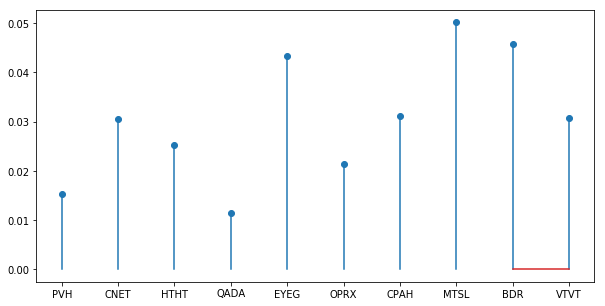

In [8]:
active_rate = pd.DataFrame( list(x),columns=['Weights'])
active_rate['Stocks'] = List
active_rate['Risk'] = np.sqrt(list(np.diag(SIGMA)))
top10_active = active_rate.nlargest(10,'Weights')


#plt.rcParams["figure.figsize"] = (15,15)
#plt.stem(active_rate['Stocks'] , active_rate['Risk'])

print(top10_active)
plt.rcParams["figure.figsize"] = (10,5)
plt.stem(top10_active['Stocks'] , top10_active['Risk'])
plt.savefig('Fama_5_active_risk.png')

In [ ]:
lamb1 = (lamb.T - lamb.mean(axis = 1))
sum(np.matmul(lamb1,lamb1.T))/(T**2)